https://keras.io/examples/nlp/pretrained_word_embeddings/

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec,KeyedVectors

import logging
import nltk
from nltk.corpus import brown   
import os 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nltk.download('brown')

import csv
import transformers
from scipy.spatial.distance import cosine
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
#% matplotlib inline

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [58]:
# read the words from your WordData.csv file
def getWords():
    words = []
    with open('DataFiles/WordData.csv', 'r') as f:       
        for line in f:
            if line.strip()=='Word':continue #Skip heading
            words.append(line.strip())
    return words
words = getWords()
print("First 5 Words: ")
words[0:5]

First 5 Words: 


['development', 'plan', 'action', 'programme', 'training']

# Word2Vec

## Training

In [59]:
sentences = brown.sents()
for vector_dims in np.arange(100,800,100):
	if not os.path.exists('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims)):
		model = gensim.models.Word2Vec(sentences, min_count=1,vector_size=vector_dims, window=5, workers=4)
		model.save('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims))
		print("Made Word2Vec Model of ", str(vector_dims), " dimensions")

In [60]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
print("First 10 dims of second word in 700 dims: ")
model.wv[words[1]][0:10]

2023-01-16 15:18:02,439 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700
2023-01-16 15:18:02,468 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.* with mmap=None
2023-01-16 15:18:02,469 : INFO : loading vectors from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.vectors.npy with mmap=None
2023-01-16 15:18:02,644 : INFO : loading syn1neg from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.syn1neg.npy with mmap=None
2023-01-16 15:18:02,789 : INFO : setting ignored attribute cum_table to None
2023-01-16 15:18:03,174 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_700', 'datetime': '2023-01-16T15:18:03.174830', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 202

First 10 dims of second word in 700 dims: 


array([ 0.04635248,  0.09131659, -0.09650849,  0.2753113 , -0.16141367,
       -0.2004109 ,  0.05806495,  0.23120125,  0.02272628,  0.13151366],
      dtype=float32)

## Testing

Missing Words from the Corpus

In [61]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
print("Missing (removed) Words:")
for word in words:
	try:
		model.wv[word]
	except:
		print(word)
		words.remove(word)

# Make word pairs:
pairs = []
for i in range(int(len(words)/2 +1)):
	pairs.append([words[i], words[i+1]])
	i+=1
print("Example Pairs:")
pairs[0:3]

2023-01-16 15:18:03,300 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700
2023-01-16 15:18:03,326 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.* with mmap=None
2023-01-16 15:18:03,329 : INFO : loading vectors from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.vectors.npy with mmap=None
2023-01-16 15:18:03,413 : INFO : loading syn1neg from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.syn1neg.npy with mmap=None
2023-01-16 15:18:03,490 : INFO : setting ignored attribute cum_table to None
2023-01-16 15:18:03,856 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_700', 'datetime': '2023-01-16T15:18:03.856084', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 202

Missing (removed) Words:
programme
programme
programme
defence
programme
Example Pairs:


[['development', 'plan'], ['plan', 'action'], ['action', 'training']]

In [62]:
model_100 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(100))
model_600 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(600))
model_700 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
np.dot(model_100.wv[words[1]],model_100.wv[words[2]]), np.dot(model_600.wv[words[1]],model_600.wv[words[2]]), np.dot(model_700.wv[words[1]],model_700.wv[words[2]])

2023-01-16 15:18:03,908 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100
2023-01-16 15:18:03,959 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100.wv.* with mmap=None
2023-01-16 15:18:03,961 : INFO : setting ignored attribute cum_table to None
2023-01-16 15:18:04,272 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_100', 'datetime': '2023-01-16T15:18:04.272833', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2023-01-16 15:18:04,287 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_600
2023-01-16 15:18:04,302 : INFO : loading wv recursively from C:\Users\henry\Desktop\M

(20.451641, 20.383715, 20.330574)

In [63]:
dot_prds = []
for dims in np.arange(100,800,100):
	model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
	dim_dot_prod = []
	for pair in pairs:
		dim_dot_prod.append(np.dot(model.wv[pair[0]],model.wv[pair[1]]))
	dot_prds.append(dim_dot_prod)
dot_prods = np.array(dot_prds)
dot_prods.shape

2023-01-16 15:18:05,335 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100
2023-01-16 15:18:05,382 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100.wv.* with mmap=None
2023-01-16 15:18:05,383 : INFO : setting ignored attribute cum_table to None
2023-01-16 15:18:05,735 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_100', 'datetime': '2023-01-16T15:18:05.735523', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2023-01-16 15:18:05,764 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_200
2023-01-16 15:18:05,785 : INFO : loading wv recursively from C:\Users\henry\Desktop\M

(7, 70)

Text(0, 0.5, 'Percentage Change from current dimension to 700')

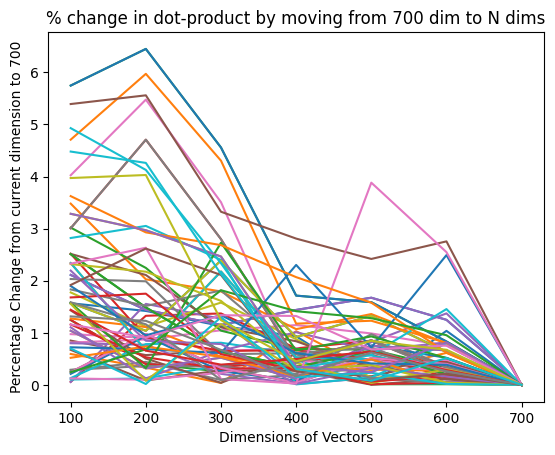

In [64]:
for word_dotprod in dot_prods.T:
	scaled_line = []
	for i, val in reversed(list(enumerate(word_dotprod))):
		try:
			if i == 0:
				scaled_line.append(val - val)
			else:
				scaled_line.append(100*abs((word_dotprod[0] - val)/word_dotprod[i-1]))
		except:
			pass
	plt.plot(np.arange(100,800,100), scaled_line)
plt.title("% change in dot-product by moving from 700 dim to N dims")
plt.xticks(np.arange(100,800,100))
plt.xlabel("Dimensions of Vectors")
plt.ylabel("Percentage Change from current dimension to 700")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Dot product')

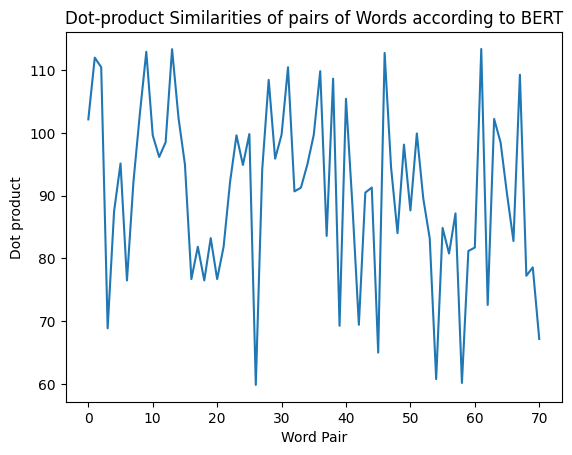

# BERT

In [71]:
class BertEncoding():
	#https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Zn0n2S-FWZih
	"""
	Reads a CSV of format:
		word1 word2, word3 word4, label
	Where word1&2 make sentence 1 and 3&4 make sentence2.
	"""
	def __init__(self, data):
		# Load pre-trained model tokenizer (vocabulary)
		self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
		self.words = data
		self.model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True).eval()# output_hidden_states is whether the model returns all hidden-states. # Put the model in "evaluation" mode, meaning feed-forward operation. 
		pass
	
	def getWordEmbedding(self, word):
		marked_text = "[CLS] " + word + " [SEP]"
		tokenized_text = self.tokenizer.tokenize(marked_text)	# Tokenize our sentence with the BERT tokenizer.
		return(tokenized_text)	# Print out the tokens.
	
	def preprocessSentence(self, word, printing=None):
		# Add the special tokens.
		tokenized_text = self.getWordEmbedding(word)
		# Map the token strings to their vocabulary indeces.
		indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

		# Mark each of the 22 tokens as belonging to sentence "1".
		segments_ids = [1] * len(tokenized_text)

		# Convert inputs to PyTorch tensors
		tokens_tensor = torch.tensor([indexed_tokens])
		segments_tensors = torch.tensor([segments_ids])
		return tokens_tensor, segments_tensors
	
	def hiddenLayersBERT(self, words):
		# Run the text through BERT, and collect all of the hidden states produced from all 12 layers. 
		hidden_states = [] 
		for idx, word in enumerate(words):
			with torch.no_grad():
				outputs = self.model(word[0])
				
				# Evaluating the model will return a different number of objects based on 
				# how it's  configured in the `from_pretrained` call earlier. In this case, 
				# becase we set `output_hidden_states = True`, the third item will be the 
				# hidden states from all layers. See the documentation for more details:
				# https://huggingface.co/transformers/model_doc/bert.html#bertmodel
				hidden_states.append(outputs[2])
		return hidden_states
	
	def GetTokenVecSum(self, hidden_state):
		# Concatenate the tensors for all layers. We use `stack` here to create a new dimension in the tensor.
		# Remove dimension 1, the "batches". Swap dimensions 0 and 1.
		token_embeddings = torch.squeeze(torch.stack(hidden_state, dim=0), dim=1).permute(1,0,2)

		# `hidden_state` has shape [13 x 1 x 22 x 768]
		# `token_vecs` is a tensor with shape [22 x 768]
		token_vecs = hidden_state[-2][0]
		word_embedding = torch.mean(token_vecs, dim=0)# Calculate the average of all 22 token vectors.
		token_vecs_sum = []#stores the token vectors, with shape [22 x 768]

		for token in token_embeddings:# `token_embeddings` is a [22 x 12 x 768] tensor.
			sum_vec = torch.sum(token[-4:], dim=0)# `token` is a [12 x 768] tensor. Sum the vectors from the last four layers.
			
			token_vecs_sum.append(sum_vec)# Use `sum_vec` to represent `token`.
		#print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))
		return token_vecs_sum, word_embedding
	
	def GetEmbeddingsForBothWords(self, words):
		token_embedding_list = []
		word_embedding_list = []
		for idx, word in enumerate(words):
			token_embedding_list.append(self.GetTokenVecSum(word)[0])
			word_embedding_list.append(self.GetTokenVecSum(word)[1])
		return token_embedding_list, word_embedding_list
	
	def evaluateWordPair(self, row_numbers):
		sents_to_evaluate = [self.preprocessSentence(self.words[row_numbers[0]]), self.preprocessSentence(self.words[row_numbers[1]])]
		hidden = self.hiddenLayersBERT(sents_to_evaluate)
		embeddings = self.GetEmbeddingsForBothWords(hidden)
		return np.dot(embeddings[1][0], embeddings[1][1])
	
	def evaluateAllSentPairs(self):
		res = []
		for idx, word in enumerate(self.words):
			if idx % 2 == 0:
				try:
					res.append(self.evaluateWordPair([idx, idx+1]))
				except:
					continue
			else:
				continue
		return res

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Dot product')

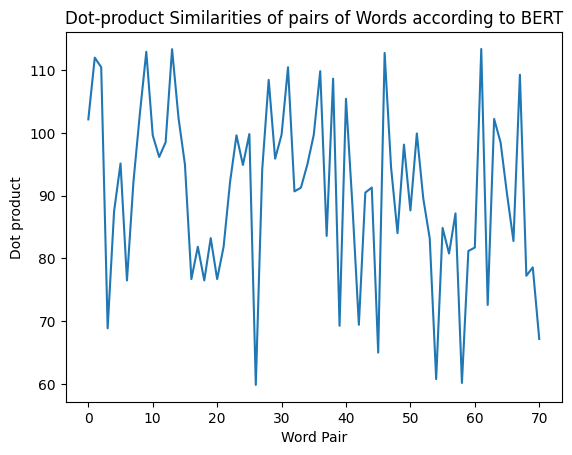

In [72]:
sentences = brown.sents()
bertWwords = BertEncoding(getWords())
similarities = bertWwords.evaluateAllSentPairs()
plt.plot(similarities)
plt.title("Dot-product Similarities of pairs of Words according to BERT")
plt.xlabel("Word Pair")
plt.ylabel("Dot product")